In [1]:
# pandas for data loading, manipulation etc.
import pandas as pd


# numeric functions
import xgboost
import numpy as np
import collections
import math
import operator
from scipy import stats
from math import ceil
import time
import random as rnd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline


# modelling
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import RFE,SelectFromModel

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet,Lars,LassoLars,SGDRegressor
from sklearn.linear_model import RidgeCV, LassoCV,BayesianRidge, LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score,train_test_split
from sklearn.metrics import make_scorer,r2_score,mean_squared_error,roc_auc_score, accuracy_score
from sklearn.neighbors import KNeighborsRegressor #,KNearestNeighborsRegressor
from collections import OrderedDict

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, minmax_scale
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor

import xgboost as xgb
from xgboost import XGBRegressor

import warnings
#warnings.filterwarnings("ignore")

In [2]:
datos = pd.read_csv('datacountstudents.csv')
datos = datos.iloc[:,1:]
# prepare for modeling
X = datos.drop(['yC'], axis=1)
Y = datos['yC'].values

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state=3)

# Create the Scaler object scaler = StandardScaler()
standarscaler = StandardScaler()

Xs = standarscaler.fit_transform(X_train)
Xs = pd.DataFrame(Xs,index=X_train.index, columns=X_train.columns.values)
Ytr=y_train

In [4]:
Xt = X_test
Yt = y_test

Xts = standarscaler.transform(Xt)
Xts = pd.DataFrame(Xts, index=Xt.index, columns=Xt.columns.values)

In [5]:
train_x=Xs
train_y=Ytr              

In [39]:
#for tuning parameters
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0,0.03,0.1,0.3],
    'min_child_weight':[1.5,6,10],
    'learning_rate':[0.1,0.07],
    'max_depth':[3,5],
    'n_estimators':[10000],
    'reg_alpha':[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5, 1e-2, 0.45],
    'subsample':[0.6,0.95]  
}

#https://www.datacamp.com/community/tutorials/xgboost-in-python borrar

In [40]:
xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=10, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(train_x,train_y)
print (gsearch1.scorer_ ) # print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 3 folds for each of 2592 candidates, totalling 7776 fits


[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:   12.6s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:   12.7s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   19.8s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:   26.2s
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:   30.3s
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   39.3s
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed:   47.5s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:   53.0s
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 133 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 169 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Do

[04:08:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
make_scorer(mean_squared_error, greater_is_better=False)
best params
{'colsample_bytree': 0.8, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1.5, 'n_estimators': 10000, 'reg_alpha': 0.01, 'reg_lambda': 1e-05, 'subsample': 0.95}
best score
-1.4990082879864663


In [6]:
data_dmatrix = xgb.DMatrix(data=Xs,label=Ytr)
#params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1, 'max_depth': 5,'alpha': 10}#, 'n_estimators' : 10
params ={"objective":"reg:squarederror",'colsample_bytree': 0.8, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1.5, 'n_estimators': 100, 'reg_alpha': 0.01, 'reg_lambda': 1e-05, 'subsample': 0.95}

In [7]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

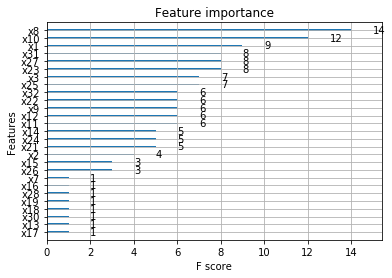

In [8]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

In [9]:
xg_reg = xgb.XGBRegressor(objective ='count:poisson')
xg_reg.fit(Xs[['x8', 'x10', 'x1', 'x31', 'x27', 'x23', 'x3','x25']],Ytr) #,,'x' , 'x31', 'x27', 'x23', 'x3','x25', 'x32', 'x22', 'x9', 'x12', 'x11', 'x14', 'x24', 'x21'
preds = xg_reg.predict(Xts[['x8', 'x10', 'x1', 'x31', 'x27', 'x23', 'x3','x25']])#7 l.r.0.1
np.sqrt(mean_squared_error(Yt, np.round(preds)))

1.1352924243950935

In [10]:
from sklearn.metrics import explained_variance_score
print(explained_variance_score(Yt,preds))

0.31250296899684116


In [11]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [12]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.449760,0.040591,1.533601,0.095235
1,1.336380,0.032029,1.494880,0.092330
2,1.241498,0.024312,1.467062,0.086750
3,1.148933,0.022559,1.431811,0.080204
4,1.060890,0.023062,1.405960,0.075718


In [13]:
print((cv_results["test-rmse-mean"]).tail(1))

14    1.289095
Name: test-rmse-mean, dtype: float64


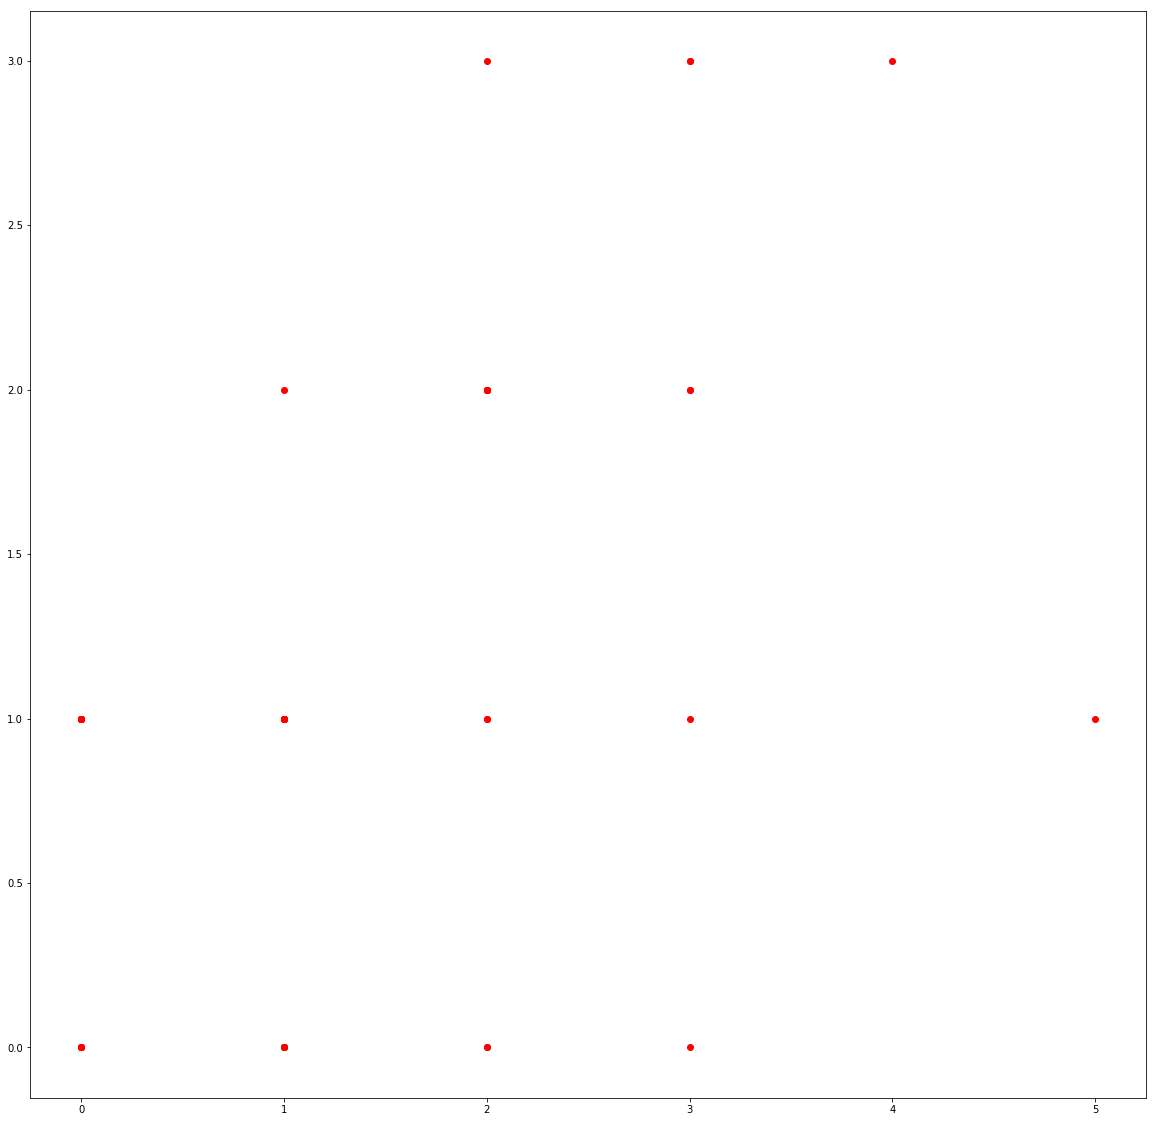

In [14]:
plt.scatter(Yt, np.round(preds), color = 'red')
